In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Step 1: Load Data
# Read the dataset into a Pandas DataFrame
df = pd.read_csv("satellite_health_dataset_unclean.csv")



















In [ ]:
df.head()

,time_since_launch,orbital_altitude,battery_voltage,solar_panel_temperature,attitude_control_error,data_transmission_rate,thermal_control_status,satellite_health
0,2903,1157.892144,29.087885,-49.621748,4.175171,33.169306,1.2,1
1,1635,756.791251,23.904613,-27.820194,3.687696,20.357112,1.2,1
2,2971,1924.587085,26.098199,40.839471,2.249584,90.533513,1.2,1
3,905,1167.102389,19.693337,18.645836,0.993406,39.218188,0.0,0
4,2857,435.414930,30.726478,-52.147571,1.970349,20.441162,0.0,1


In [2]:
df.shape

(9200, 8)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9200 entries, 0 to 9199
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   time_since_launch        9200 non-null   int64  
 1   orbital_altitude         9200 non-null   float64
 2   battery_voltage          8691 non-null   float64
 3   solar_panel_temperature  8896 non-null   float64
 4   attitude_control_error   9200 non-null   float64
 5   data_transmission_rate   9200 non-null   float64
 6   thermal_control_status   9200 non-null   float64
 7   satellite_health         9200 non-null   int64  
dtypes: float64(6), int64(2)
memory usage: 575.1 KB


# Missing values are replaced with the median of the respective column.

In [4]:
df.isnull().sum()

,0
time_since_launch,0
orbital_altitude,0
battery_voltage,509
solar_panel_temperature,304
attitude_control_error,0
data_transmission_rate,0
thermal_control_status,0
satellite_health,0


In [5]:

# Step 2: Data Cleaning
# Handling missing values by replacing them with the median of the respective column
df.fillna(df.median(), inplace=True)

# Removes duplicate rows to avoid redundant data that could bias the model.

In [6]:
duplicate_count = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")

Number of duplicate rows: 200


In [7]:
# Removing duplicate rows, if any
df.drop_duplicates(inplace=True)



In [8]:
df.shape

(9000, 8)

# Handling Outliers (Capping at 99th percentile)
1.
Why handle outliers? Extreme values can negatively impact machine learning models.
2.
Why cap at the 99th percentile? It removes extreme cases while retaining most of the distribution.

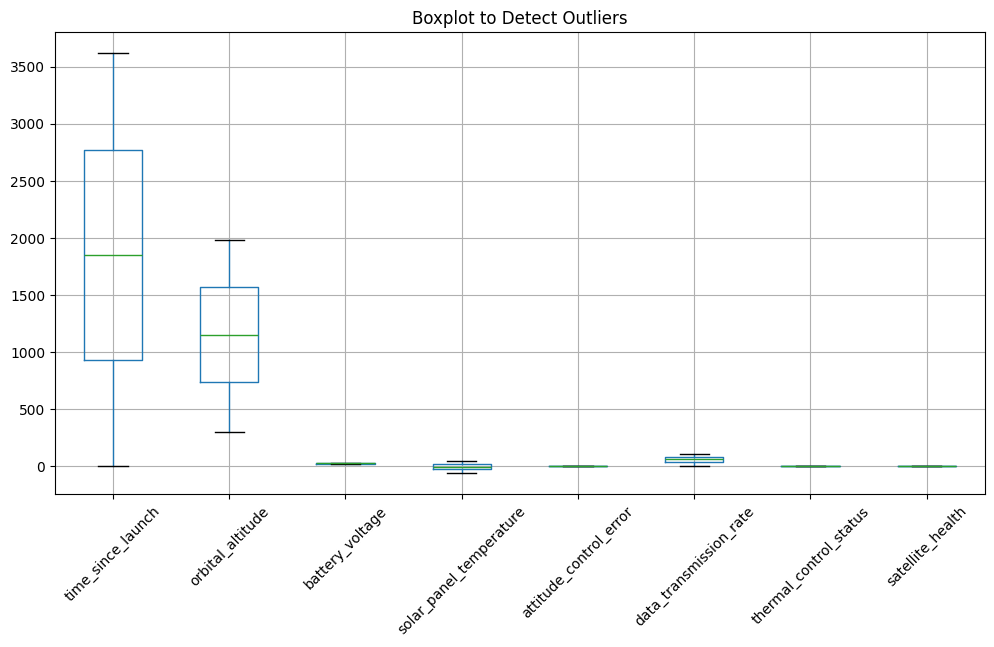

In [ ]:
# Visualizing outliers using box plots for numerical features
plt.figure(figsize=(12, 6))
df.select_dtypes(include=['float64', 'int64']).boxplot(rot=45)
plt.title("Boxplot to Detect Outliers")
plt.show()


In [ ]:
# Handling outliers by capping values at the 99th percentile to remove extreme values
for col in df.select_dtypes(include=['float64', 'int64']).columns:
    upper_limit = df[col].quantile(0.99)
    df[col] = np.where(df[col] > upper_limit, upper_limit, df[col])

# Class Distribution
1. Helps check if the dataset is balanced or imbalanced.
2. If one class has significantly more samples, we may need resampling techniques.

In [ ]:
# Check the distribution of the 'satellite_health' column
print(df['satellite_health'].value_counts())

satellite_health
1.0    4510
0.0    4490
Name: count, dtype: int64


<ipython-input-33-548f39a681f6>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df["satellite_health"], palette="coolwarm")


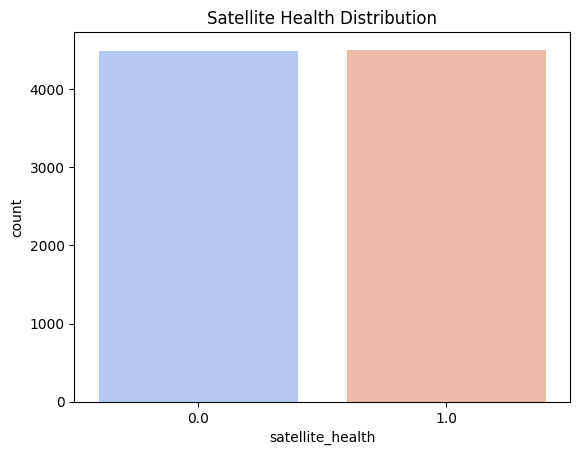

In [ ]:

# Visualization: Target distribution
sns.countplot(x=df["satellite_health"], palette="coolwarm")
plt.title("Satellite Health Distribution")
plt.show()

1. A heatmap helps us identify how strongly features are related to each other.
2. Values close to +1 or -1 indicate a strong correlation, while values near 0 suggest weak relationships.

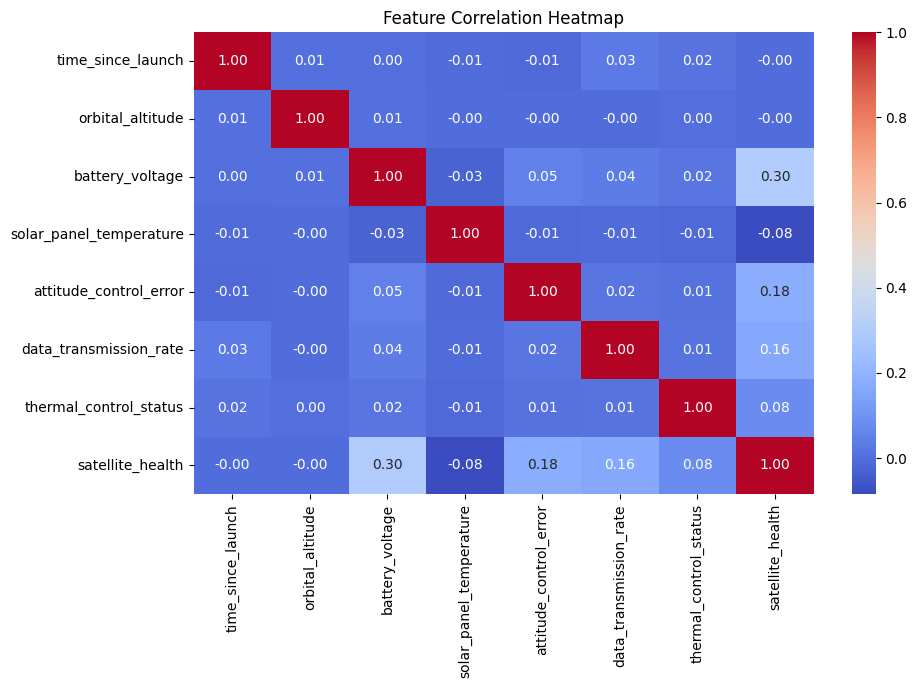

In [ ]:
# Step 3: Data Analysis & Visualization
# Heatmap to show correlation between features
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

# Splitting Features (X) and Target Variable (y)

Separates the dataset into:

X: Feature variables.


y: Target variable (which we are predicting).

In [ ]:
# Step 4: Prepare Data for ML
# Splitting data into features (X) and target variable (y)
X = df.drop(columns=["satellite_health"])
y = df["satellite_health"]

# Splitting dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# The StandardScaler is a preprocessing technique that standardizes the features by removing the mean and scaling to unit variance. It ensures that each feature has:

A mean of 0
A standard deviation of 1
Why is this important?
Prevents bias – If features have different scales (e.g., one feature ranges from 1-1000, while another ranges from 0-1), models like Logistic Regression, SVM, and SGDClassifier may give more weight to larger numbers, leading to biased results.
Improves convergence – Many machine learning algorithms (especially gradient-based methods like Logistic Regression, SVM, and Neural Networks) perform better and converge faster when data is standardized.
Better model performance – Scaling improves accuracy and prevents some models from getting stuck in local minima.
Formula used by StandardScaler:
𝑋
scaled
=
𝑋
−
𝜇
𝜎
X
scaled
​
 =
σ
X−μ
​

Where:

𝑋
X is the original feature value
𝜇
μ is the mean of the feature
𝜎
σ is the standard deviation
This transformation ensures that all features have the same scale while preserving the distribution shape.

In [ ]:
# Feature Scaling to standardize feature values for better model performance
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Defining ML Models

Defines multiple machine learning models.

Why multiple models? Helps compare different algorithms to find the best one.





# Confusion Matrix & Classification Report

Confusion Matrix shows:
1. True Positives (TP)
2. True Negatives (TN)
3. False Positives (FP)
4. False Negatives (FN)

Classification Report provides:
1. Precision (Positive Predictive Value)
2. Recall (Sensitivity)




TP (True Positives): Correctly predicted positive cases
FP (False Positives): Incorrectly predicted positive cases
Precision: Out of all predicted positive cases, how many were actually positive?


FN (False Negatives): Actual positive cases that were misclassified as negative
Recall : Out of all actual positive cases, how many were correctly identified?

In [ ]:
# Step 5: Train & Evaluate Models
# Define multiple ML models for comparison
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(),
    "SGD Classifier": SGDClassifier()
}

results = {}  # Store accuracy results for each model

for name, model in models.items():
    model.fit(X_train, y_train)  # Train the model
    y_pred = model.predict(X_test)  # Make predictions
    acc = accuracy_score(y_test, y_pred)  # Calculate accuracy
    results[name] = acc  # Store accuracy result

    # Print evaluation metrics
    print(f"{name} Accuracy: {acc:.4f}")
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("-"*50)

Logistic Regression Accuracy: 0.6533
Confusion Matrix:
 [[561 326]
 [298 615]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.65      0.63      0.64       887
         1.0       0.65      0.67      0.66       913

    accuracy                           0.65      1800
   macro avg       0.65      0.65      0.65      1800
weighted avg       0.65      0.65      0.65      1800

--------------------------------------------------
Random Forest Accuracy: 0.8422
Confusion Matrix:
 [[746 141]
 [143 770]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.84      0.84      0.84       887
         1.0       0.85      0.84      0.84       913

    accuracy                           0.84      1800
   macro avg       0.84      0.84      0.84      1800
weighted avg       0.84      0.84      0.84      1800

--------------------------------------------------
SVM Accuracy: 0.8394
Confusion Matrix:
 [[73

<ipython-input-29-e6782184dff1>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(results.keys()), y=list(results.values()), palette="viridis")


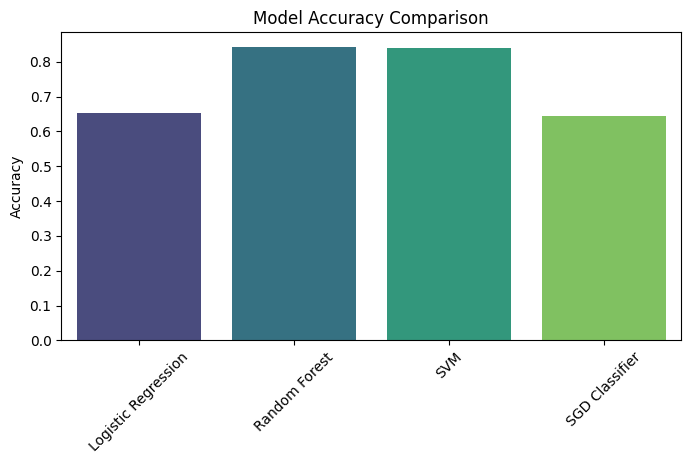

In [ ]:
# Step 6: Compare Model Performance
# Bar plot to compare model accuracy
plt.figure(figsize=(8, 4))
sns.barplot(x=list(results.keys()), y=list(results.values()), palette="viridis")
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.xticks(rotation=45)
plt.show()

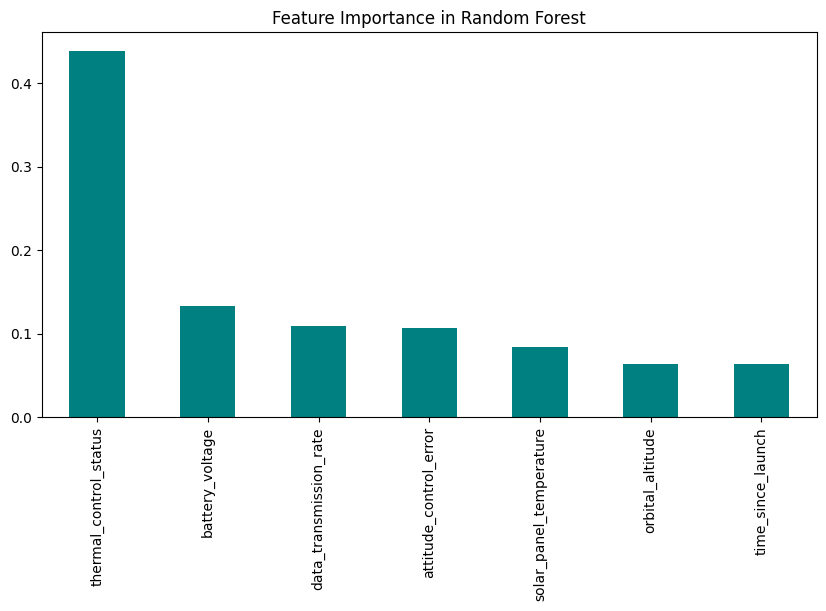

Cross-validation scores: [0.84277778 0.85555556 0.82611111 0.83666667 0.83611111]
Mean CV Accuracy: 0.8394444444444444


In [ ]:
# Additional Concept: Feature Importance for Random Forest
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
feature_importances = pd.Series(rf.feature_importances_, index=df.drop(columns=['satellite_health']).columns)
feature_importances.sort_values(ascending=False).plot(kind='bar', figsize=(10, 5), color='teal')
plt.title("Feature Importance in Random Forest")
plt.show()



# Cross-validation splits data into multiple folds and tests the model on different subsets.

In [ ]:
# Additional Concept: Cross-validation for better model evaluation
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(RandomForestClassifier(), X, y, cv=5)
print("Cross-validation scores:", cv_scores)
print("Mean CV Accuracy:", np.mean(cv_scores))

Cross-validation scores: [0.83944444 0.85277778 0.82944444 0.84611111 0.83388889]
Mean CV Accuracy: 0.8403333333333333
